# diabete Classification

Using SVM, Linear Regression, RF, DT, KNN

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/anchanghun/Downloads/diabetes.csv")

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:

from sklearn.preprocessing import LabelEncoder

# Label Encoding 적용
label_encoder = LabelEncoder()
df['Outcome'] = label_encoder.fit_transform(df['Outcome'])

# 인코딩된 데이터프레임 확인
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
y = df['Outcome']


In [5]:
X = df.drop('Outcome',axis=1)
X = X.values

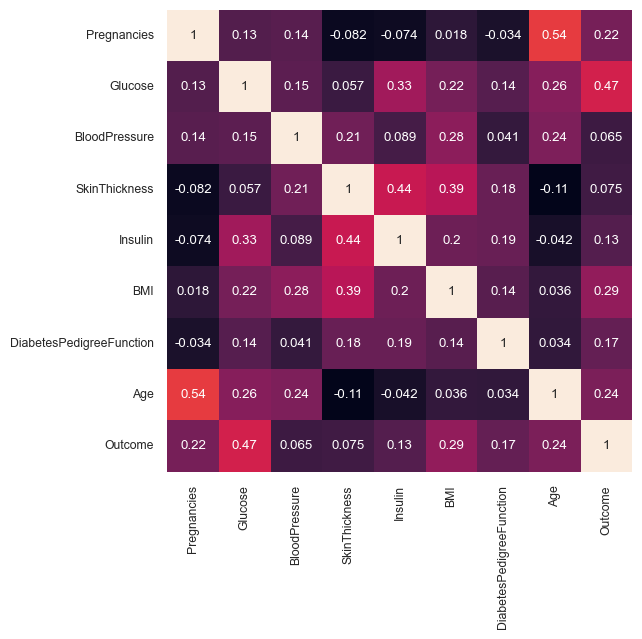

In [6]:

df_corr=df.corr()

#히트맵
plt.figure(figsize=(6,6))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
# 특성 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [9]:
y_train

603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 614, dtype: int64

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(8,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))


model.compile(Adam(lr=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                90        
                                                                 
 dense_13 (Dense)            (None, 8)                 88        
                                                                 
 dense_14 (Dense)            (None, 6)                 54        
                                                                 
 dense_15 (Dense)            (None, 1)                 7         
                                                                 
Total params: 239 (956.00 Byte)
Trainable params: 239 (956.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
epochs = 30
model_history=model.fit(x=X_train, y=y_train, epochs=epochs, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)


Epoch 1/30
20/20 [==============================] - 0s 3ms/step - loss: 0.7383 - accuracy: 0.5928 - val_loss: 0.7101 - val_accuracy: 0.6169
Epoch 2/30
20/20 [==============================] - 0s 797us/step - loss: 0.7002 - accuracy: 0.6107 - val_loss: 0.6889 - val_accuracy: 0.6234
Epoch 3/30
20/20 [==============================] - 0s 921us/step - loss: 0.6834 - accuracy: 0.6124 - val_loss: 0.6766 - val_accuracy: 0.6299
Epoch 4/30
20/20 [==============================] - 0s 885us/step - loss: 0.6675 - accuracy: 0.6205 - val_loss: 0.6653 - val_accuracy: 0.6364
Epoch 5/30
20/20 [==============================] - 0s 848us/step - loss: 0.6572 - accuracy: 0.6205 - val_loss: 0.6575 - val_accuracy: 0.6364
Epoch 6/30
20/20 [==============================] - 0s 841us/step - loss: 0.6508 - accuracy: 0.6221 - val_loss: 0.6532 - val_accuracy: 0.6364
Epoch 7/30
20/20 [==============================] - 0s 838us/step - loss: 0.6456 - accuracy: 0.6238 - val_loss: 0.6499 - val_accuracy: 0.6364
Epoch 8/

In [28]:
y_pred

array([[0.53364354],
       [0.25218615],
       [0.16601935],
       [0.43282878],
       [0.22253165],
       [0.12713629],
       [0.43045685],
       [0.43258855],
       [0.4443541 ],
       [0.21228442],
       [0.4328288 ],
       [0.4328288 ],
       [0.20721322],
       [0.4328267 ],
       [0.59949625],
       [0.38021493],
       [0.25107455],
       [0.15399252],
       [0.35702807],
       [0.49542794],
       [0.5335787 ],
       [0.24585234],
       [0.6374071 ],
       [0.50857097],
       [0.32081497],
       [0.53364354],
       [0.19023937],
       [0.37726158],
       [0.2580325 ],
       [0.23000096],
       [0.4328288 ],
       [0.43312785],
       [0.17711516],
       [0.4328288 ],
       [0.2505203 ],
       [0.53364354],
       [0.40892896],
       [0.25044593],
       [0.5826237 ],
       [0.251036  ],
       [0.25070012],
       [0.13351205],
       [0.25556996],
       [0.53364354],
       [0.4443541 ],
       [0.4642253 ],
       [0.2505203 ],
       [0.265

In [29]:
#y_test_class = np.argmax(y_test,axis=1)
#y_pred_class = np.argmax(y_pred,axis=1)

y_test_class = y_test
y_pred_class = y_pred

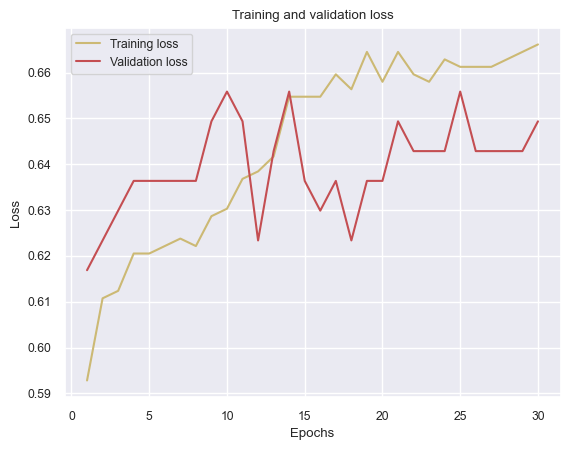

In [30]:


loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

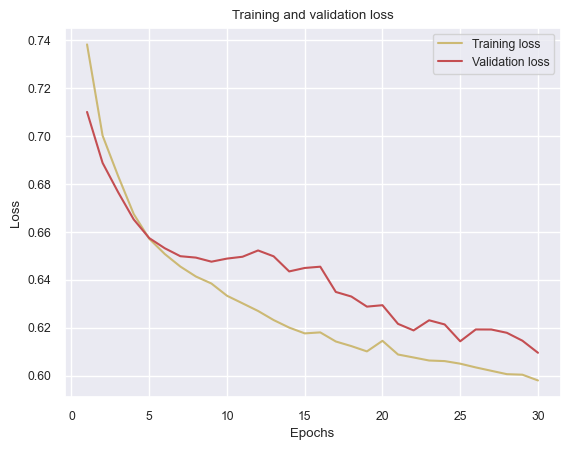

In [31]:


loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict probabilities
y_pred = model.predict(X_test)

# Convert probabilities to class labels (binary classification: 0 or 1)
y_pred_class = (y_pred > 0.5).astype(int)

# Assuming y_test_class is already in discrete class format
# Print classification report and confusion matrix
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

5/5 [==============================] - 0s 694us/step
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       107
           1       0.39      0.28      0.33        47

    accuracy                           0.65       154
   macro avg       0.56      0.54      0.54       154
weighted avg       0.62      0.65      0.63       154

[[87 20]
 [34 13]]


In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       107
           1       0.39      0.28      0.33        47

    accuracy                           0.65       154
   macro avg       0.56      0.54      0.54       154
weighted avg       0.62      0.65      0.63       154

[[87 20]
 [34 13]]


In [35]:
# 데이터 스케일링 (SVM, KNN 같은 모델에 필수)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# 2. Logistic Regression (LR)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# 3. Random Forest (RF)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# 4. Decision Tree (DT)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# 5. k-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

SVM Accuracy: 0.7922077922077922
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154

Logistic Regression Accuracy: 0.8246753246753247
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

Random Forest Accuracy: 0.8311688311688312
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       107
           1       0.72      0.72      0.72        47

    accuracy                           0.83       154
   

/Users/anchanghun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
